<a href="https://colab.research.google.com/github/Sugina99/Deep_Learning_Studies/blob/main/My_Churn_ModellingANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# !pip install tensorflow.gpu

In [34]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
print(tf.__version__)

2.8.2


In [36]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# dataset
data=pd.read_csv("/content/drive/MyDrive/LibrariesForAI/Deep_learning/ANN/Churn_Modelling/Churn_Modelling.csv")


In [38]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
X=data.iloc[:,3:13]
y=data.iloc[:,13]

In [40]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [41]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [42]:
# create dummy variables
# OneHot Encoding
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [43]:
 X=pd.concat([X,geography,gender],axis=1)

In [44]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [45]:
# Splitting to X_train,X_test,y_train and y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [46]:
# Scaling down
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [47]:
# Artificial Nueral Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [48]:
# initialising
classifier=Sequential()

In [49]:
# Adding the input layer
classifier.add(Dense(units=11,activation="relu"))

In [50]:
# Creating hidden layers 1
classifier.add(Dense(units=6,activation="relu"))

In [51]:
# Creating hidden layers 2
classifier.add(Dense(units=4,activation="relu"))

In [52]:
# Creating output layers 
classifier.add(Dense(units=1,activation="sigmoid"))

In [53]:
# Creating hidden layers 1
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
# Model_fitting
# model_history=classifier.fit(X_train_scaled,y_train,validation_split=0.33,batch_size=10,epochs=100)

In [55]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

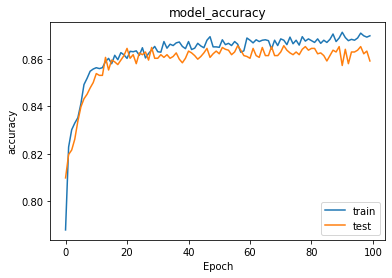

In [56]:
# summarize history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [60]:
early_stopper=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [61]:
model_history=classifier.fit(X_train_scaled,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopper)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.4992 - accuracy: 0.7876 - val_loss: 0.4376 - val_accuracy: 0.8012
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4366 - accuracy: 0.7966 - val_loss: 0.4227 - val_accuracy: 0.8012
Epoch 2: early stopping
